Python version:
3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Platform: Linux-6.1.85+-x86_64-with-glibc2.35
Mounted at /content/drive
   Age  Salary  Experience
0   25   50000           2
1   30   60000           4
2   35   75000           6
3   40   80000           8
4   45   90000          10
             Age        Salary  Experience
count   5.000000      5.000000    5.000000
mean   35.000000  71000.000000    6.000000
std     7.905694  15968.719423    3.162278
min    25.000000  50000.000000    2.000000
25%    30.000000  60000.000000    4.000000
50%    35.000000  75000.000000    6.000000
75%    40.000000  80000.000000    8.000000
max    45.000000  90000.000000   10.000000
Mean Squared Error: 2040816.3265305886
R2 Score: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


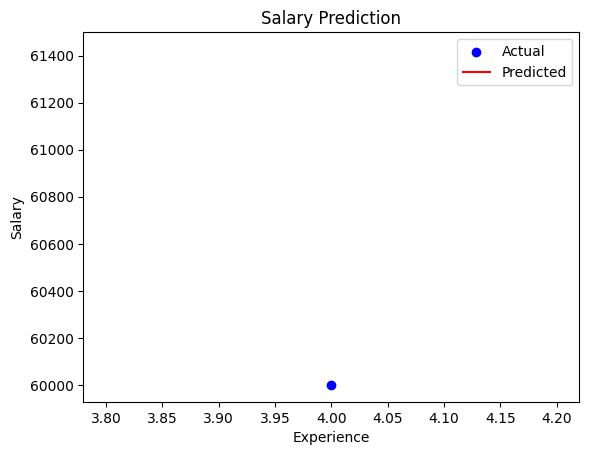

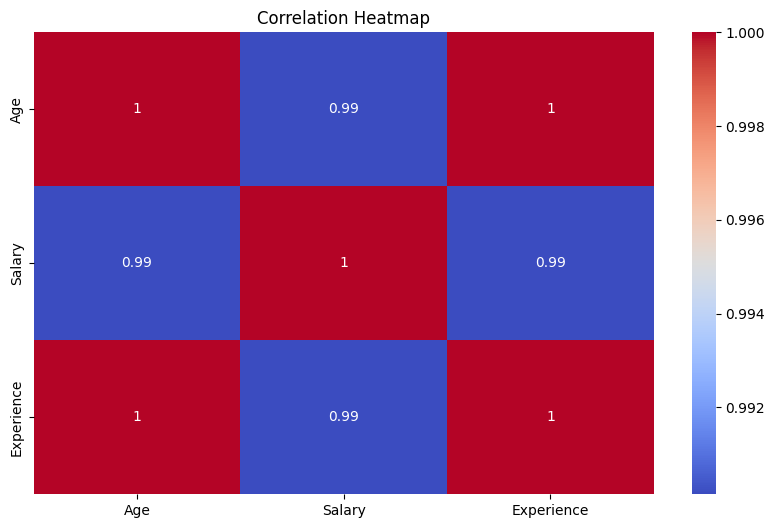

Num GPUs Available:  0


In [1]:
# This will be your first code cell
import sys
print("Python version:")
print(sys.version)

# Check available resources
import platform
print("Platform:", platform.platform())

# Install key machine learning libraries
!pip install numpy pandas scikit-learn matplotlib seaborn tensorflow keras

# Import essential libraries for data science and ML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Mount Google Drive to store and access datasets
from google.colab import drive
drive.mount('/content/drive')

# Create a project folder in Google Drive
!mkdir -p '/content/drive/MyDrive/ML_Projects'

# Create a sample dataset
data = {
    'Age': [25, 30, 35, 40, 45],
    'Salary': [50000, 60000, 75000, 80000, 90000],
    'Experience': [2, 4, 6, 8, 10]
}
df = pd.DataFrame(data)

# Basic data exploration
print(df.head())  # First 5 rows
print(df.describe())  # Statistical summary

# Prepare data for a simple regression problem
X = df[['Experience']]  # Features
y = df['Salary']  # Target variable

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a simple Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Salary Prediction')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

# More sophisticated visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Check for GPU
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

